# Assignment 3 - Supervised Learning

## *Jingwen Wang*
Netid:  *jw609*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(a)**
$L(\mathbf{w}) = \frac{1}{m}\prod_{i=0}^m{\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-y_i}} $

**(b)**
$C(\mathbf{w})= -lnL(\mathbf{w}) = -\frac{1}{m}ln {\sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i}[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]^{1-y_i}} =  -\frac{1}{m}\sum_{i=0}^m{y_i*ln\sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i)*ln[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]}$

**(c)**

$C(\mathbf{w}) = -\frac{1}{m}\sum_{i=0}^m{y_i*ln\sigma(\mathbf{w}^T \mathbf{x}_i) + (1-y_i)*ln[1-\sigma(\mathbf{w}^T \mathbf{x}_i)]}$

$where\ \ ln\sigma(\mathbf{w}^T \mathbf{x}_i) = ln \frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}_i}} = - ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})$

$and \ \ ln[1-\sigma(\mathbf{w}^T \mathbf{x}_i)] = ln [1 - \frac{1}{1+e^{-\mathbf{w}^T \mathbf{x}_i}}] = ln \frac{-e^{\mathbf{w}^T \mathbf{x}_i}}{1 + e^{-\mathbf{w}^T \mathbf{x}_i}} = ln e^{-\mathbf{w}^T \mathbf{x}_i} - ln (1 + e^{-\mathbf{w}^T \mathbf{x}_i}) = -\mathbf{w}^T \mathbf{x}_i - log(1 + e^{-\mathbf{w}^T \mathbf{x}_i})$

$C(\mathbf{w}) = -\frac{1}{m}\sum_{i=0}^m y_i[- ln(1+e^{-\mathbf{w}^T \mathbf{x}_i})] + (1-y_i)[-\mathbf{w}^T \mathbf{x}_i - log(1 + e^{\mathbf{w}^T \mathbf{x}_i})]\\
\ \ \ \ \ \ \ \ = -\frac{1}{m}\sum_{i=0}^m [y_i\mathbf{w}^T \mathbf{x}_i - \mathbf{w}^T \mathbf{x}_i - log(1+e^{-\mathbf{w}^T \mathbf{x}_i})] \\
\ \ \ \ \ \ \ \ = -\frac{1}{m}\sum_{i=0}^m \{y_i\mathbf{w}^T \mathbf{x}_i - [loge^{\mathbf{w}^T \mathbf{x}_i} + log(1+e^{-\mathbf{w}^T \mathbf{x}_i})]\}\\
\ \ \ \ \ \ \ \ = -\frac{1}{m}\sum_{i=0}^m [y_i\mathbf{w}^T \mathbf{x}_i - log(1 + e^{\mathbf{w}^T \mathbf{x}_i})] $




$since\ \frac{\partial}{\partial w_j}(y_i\mathbf{w}^T \mathbf{x}_i) = y_i \mathbf{x}_{ij}$

$and\ \frac{\partial C}{\partial w_j}[log(1 + e^{\mathbf{w}^T \mathbf{x}_i})] = \frac{e^{\mathbf{w}^T \mathbf{x}_i}}{1+e^{\mathbf{w}^T \mathbf{x}_i}}x_{ij} = \sigma(\mathbf{w}^T \mathbf{x}_i)x_{ij}$

$\frac{\partial}{\partial w_j} C(\mathbf{w}) = \sum_{i=0}^m [y_i \mathbf{x}_{ij} - \sigma(\mathbf{w}^T \mathbf{x}_i)\mathbf{x}_{ij}] = \sum_{i=0}^m (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i)x_{ij}$

so 

$\frac{\partial C}{\partial w_0} = \sum_{i=0}^m (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i) \ \ (since\ x_{i0}=1)$

$\frac{\partial C}{\partial w_1} = \sum_{i=0}^m (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i)x_{i1}$

$\frac{\partial C}{\partial w_2} = \sum_{i=0}^m (\sigma(\mathbf{w}^T \mathbf{x}_i) - y_i)x_{i2}$

**(d)**
$w_j = w_j - \eta\frac{\partial C}{\partial w_j}$

In [270]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

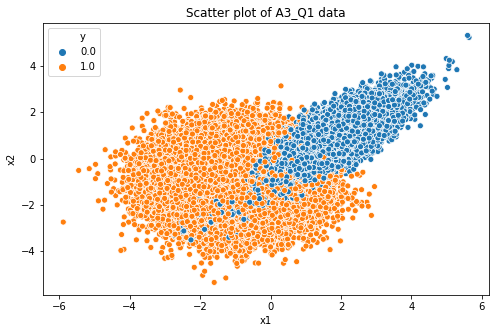

In [272]:
#(e)
df = pd.read_csv('./data/A3_Q1_data.csv')
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(y='x2',x='x1',hue='y', data=df)
plt.title('Scatter plot of A3_Q1 data')

The data does NOT appear to be separable. There are some overlaps at the left down corner. 

It might not be a good choice to use logistic regression because our data has a non-linear boundary and is hard to split in two dimentsion.


In [273]:
# (f)
df.isna().any()

x1    False
x2    False
y     False
dtype: bool

In [274]:
df.describe()

,x1,x2,y
count,100000.000000,100000.000000,100000.000000
mean,0.048529,-0.397106,0.500000
std,1.452409,1.164015,0.500003
min,-5.886436,-5.352265,0.000000
25%,-1.041007,-1.206343,0.000000
50%,0.039551,-0.401099,0.500000
75%,1.143536,0.402899,1.000000
max,5.634476,5.317718,1.000000


The data does not have any missing value. 

The scale of x1 and x2 is not exactly the same. We can use standard scaler to scale both x1 and x2 to a mean of 0 and std of 1.

In [275]:
from sklearn.preprocessing import StandardScaler

s1 = StandardScaler()
df.loc[:,['x1','x2']] = s1.fit_transform(df.loc[:,['x1','x2']])
df.describe()

,x1,x2,y
count,1.000000e+05,1.000000e+05,100000.000000
mean,9.232615e-18,-4.213296e-17,0.500000
std,1.000005e+00,1.000005e+00,0.500003
min,-4.086311e+00,-4.256975e+00,0.000000
25%,-7.501616e-01,-6.952156e-01,0.000000
50%,-6.181174e-03,-3.430496e-03,0.500000
75%,7.539289e-01,6.872842e-01,1.000000
max,3.846008e+00,4.909603e+00,1.000000


In [288]:
#(g)
import numpy as np

def sigmoid(z):
    s = 1.0 / (1.0 + np.exp(-z))    
    return s

def log_regression(w, X):
    A = sigmoid(np.dot(w.T, X))      
    return A

In [293]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [294]:
#(h)
def cost_entropy(X, Y, A, epsilon = 1e-5 ):
    m = X.shape[0]
    cost = 1/m * np.sum((-Y)*np.log(A+ epsilon) - (1-Y)*np.log(1-A + epsilon))
    return cost

In [295]:
#(i) (j)
def initialization(dim):
    w = np.random.uniform(0, 1, (dim, 1))
    return w    

In [296]:
dim = 2
w = initialization(dim)
print ("w = " + str(w))


w = [[0.78551035]
 [0.27548692]]


In [279]:
def propagate(w, X_train, Y_train, X_test, Y_test):
    m = X.shape[0] # each col is a sample
    
    # FORWARD PROPAGATION
    A_train = sigmoid(np.dot(w.T, X_train))                   # compute activation
    cost_train = cost_entropy(X_train, Y_train, A_train)      # compute cost
    
    A_test = sigmoid(np.dot(w.T, X_test)) 
    cost_test = cost_entropy(X_test, Y_test, A_test)
 
    # BACKWARD PROPAGATION 
    dw = np.dot(X_train, (A_train-Y_train).T)

    cost_train = np.squeeze(cost_train)
    cost_test = np.squeeze(cost_test)

    return dw, cost_train, cost_test

In [302]:
w, X, Y = np.array([[1.],[2.],[2.]]), np.array([[1,1,1],[1.,2.,-1.],[3.,4.,-3.2]]),  np.array([[1,0,1]])
dw, grads, cost = propagate(w, X, Y , X, Y)
print ("dw = " + str(dw))
print ("cost = " + str(cost))

dw = [[4.85224459e-04]
 [2.99926121e+00]
 [7.19766596e+00]]
cost = 6.231209780075824


In [307]:
def optimize(w, X_train, Y_train, X_test, Y_test, learning_rate, threshold, print_cost):
    costs_train = [np.inf]
    costs_test = [np.inf]
    i = 0
    while True:
        # Cost and gradient calculation 
        dw, cost_train, cost_test = propagate(w, X_train, Y_train, X_test, Y_test) 
        # update rule
        l2_norm_prev = np.sum(w**2)
        w = w - learning_rate*dw
        l2_norm = np.sum(w**2)
        
        # Record the costs
        costs_train.append(cost_train)
        costs_test.append(cost_test)
        i += 1
        if np.abs(l2_norm_prev - l2_norm) < threshold:
            print ("Training Cost after iteration %i: %f" %(i, cost_train))
            print('No evident improvment, Stop trainging.')
            break
        if i == 5000:
            print ("Training Cost after iteration %i: %f" %(i, cost_train))
            print('Too many epoches, Stop trainging.')
            break
        
        if print_cost and i %100 == 0:
            print ("Training Cost after iteration %i: %f" %(i, cost_train))
        

    return w, dw, costs_train, costs_test

In [309]:
w, dw, costs_train, costs_test = optimize(w, X, Y, X, Y, learning_rate = 0.009, print_cost = False, threshold=10e-6)

print ("w = " + str(w))
print ("dw = " + str(dw))

Training Cost after iteration 5000: 0.083165
Too many epoches, Stop trainging.
w = [[ 4.89463306]
 [-4.58359009]
 [ 0.51286827]]
dw = [[-0.03844212]
 [ 0.06023909]
 [-0.01498674]]


In [312]:
def model(X_train, Y_train, X_test, Y_test, threshold=10e-5, learning_rate = 0.00001, print_cost = False):
   
    w = initialization(X_train.shape[0])

    # Gradient descent
    w, dw, costs_train, costs_test = optimize(w, X_train, Y_train, X_test, Y_test, learning_rate = learning_rate, threshold=threshold, print_cost = print_cost)
  
    return w, costs_train, costs_test

In [313]:
def predict_label(w, X ,th=0.5):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1) 
   
    A = sigmoid(np.dot(w.T, X)) 
    
    for i in range(A.shape[1]):       
        Y_prediction[0][i] = 1 if A[0][i] > th else 0
   
    return Y_prediction

def predict_prob(w, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1) 
   
    A = sigmoid(np.dot(w.T, X)) 
   
    return A

In [314]:
w = np.array([[0.1124579],[0.23106775], [-0.3]])

X = np.array([[1,1,1],[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict_prob(w, X)))

predictions = [[0.49588151 0.32262888 0.34142308]]


In [315]:
#### TRAINING ####
from sklearn.model_selection import train_test_split

X = df.loc[:, ['x1', 'x2']].values
Y = df.y.values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.7, random_state=2019)

# adding 1 into X and reshape X, y 
X_train = np.r_[np.ones([1, X_train.shape[0]]), X_train.T]
X_test = np.r_[np.ones([1, X_test.shape[0]]), X_test.T]
Y_train = Y_train.reshape(1,-1)
Y_test = Y_test.reshape(1,-1)

In [316]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3, 30000), (3, 70000), (1, 30000), (1, 70000))

In [317]:
plot_epoches = 150
cost_df = pd.DataFrame(data=[i for i in range(1, plot_epoches+1)], columns=['epoch'])

In [318]:
_, costs_train, costs_test = model(X_train, Y_train, X_test, Y_test, learning_rate = 10e-7, threshold=10e-6, print_cost = False)
cost_df['lr=10e-7'] = pd.DataFrame(data=costs_train[1:plot_epoches+1])

Training Cost after iteration 56: 6771.251866
No evident improvment, Stop trainging.


In [319]:
_, costs_train, costs_test = model(X_train, Y_train, X_test, Y_test, learning_rate = 10e-6, threshold=10e-6, print_cost = False)
cost_df['lr=10e-6'] = pd.DataFrame(data=costs_train[1:plot_epoches+1])

Training Cost after iteration 1100: 3255.281177
No evident improvment, Stop trainging.


In [320]:
_, costs_train, costs_test = model(X_train, Y_train, X_test, Y_test, learning_rate = 10e-5, threshold=10e-6, print_cost = False)
cost_df['lr=10e-5'] = pd.DataFrame(data=costs_train[1:plot_epoches+1])

Training Cost after iteration 137: 3255.281157
No evident improvment, Stop trainging.


In [321]:
_, costs_train, costs_test = model(X_train, Y_train, X_test, Y_test, learning_rate = 10e-4, threshold=10e-6, print_cost = False)
cost_df['lr=10e-4'] = pd.DataFrame(data=costs_train[1:plot_epoches+1])

Training Cost after iteration 5000: 5928.755167
Too many epoches, Stop trainging.


In [226]:
_, costs_train, costs_test = model(X_train, Y_train, X_test, Y_test, learning_rate = 10e-3, threshold=10e-6, print_cost = False)
cost_df['lr=10e-3'] = pd.DataFrame(data=costs_train[1:plot_epoches+1])

/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Training Cost after iteration 5000: 14855.743568
Too many epoches, Stop trainging.


In [227]:
cost_df.head()

,epoch,lr=10e-7,lr=10e-6,lr=10e-5,lr=10e-4,lr=10e-3
0,1,11322.362566,14068.261282,14487.317824,10966.811815,8039.933165
1,2,11177.179268,12272.402084,4035.404989,10704.622514,17007.218789
2,3,11034.145251,10692.018660,3734.835948,9636.942938,16228.801351
3,4,10893.269650,9347.516038,3587.663198,8650.668157,15548.291021
4,5,10754.560326,8243.192721,3498.550559,7734.804639,14950.133501


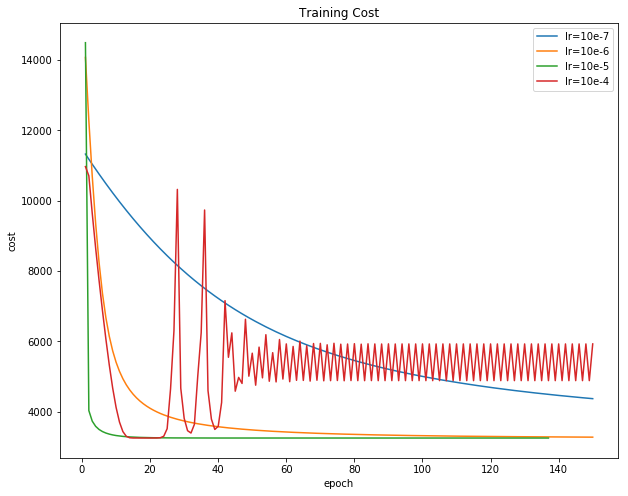

In [229]:
# (k)
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(y='lr=10e-7', x='epoch', data=cost_df, label='lr=10e-7')
sns.lineplot(y='lr=10e-6', x='epoch', data=cost_df, label='lr=10e-6')
sns.lineplot(y='lr=10e-5', x='epoch', data=cost_df, label='lr=10e-5')
sns.lineplot(y='lr=10e-4', x='epoch', data=cost_df, label='lr=10e-4')

plt.title('Training Cost')
plt.ylabel('cost')

As can be seen above, learning rate should neither be too high(lr=10e-4), which could lead to unconvergence.
It shoud not be too too low which will slow the training process(lr=10e-7).

So, in our case, we choose lr = 10e-5

**(l)**

Training Cost after iteration 131: 2631.723745
No evident improvment, Stop trainging.
Training Cost after iteration 133: 2612.212656
No evident improvment, Stop trainging.
Training Cost after iteration 135: 2593.190759
No evident improvment, Stop trainging.
Training Cost after iteration 131: 2591.335427
No evident improvment, Stop trainging.
Training Cost after iteration 130: 2591.728127
No evident improvment, Stop trainging.


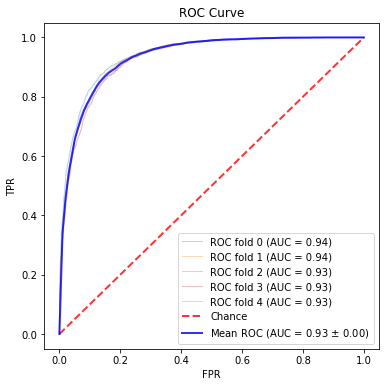

In [236]:
# (l)
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5)
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
i=0

X=X_train
y=Y_train

fig, ax = plt.subplots(figsize=(6,6))
for train_index,test_index in cv.split(X.T,y.T):
    X_cv_train, X_cv_test = X[:, train_index], X[:, test_index]
    y_cv_train, y_cv_test = y[:, train_index], y[:, test_index]
    
    w, _, _ = model(X_cv_train, y_cv_train, X_cv_test, y_cv_test, learning_rate=10e-5)

    y_cv_prob = predict_prob(w, X_cv_test)
    
    fpr,tpr,thresholds = roc_curve(y_cv_test.T,y_cv_prob.T)
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

**(m)**
We use cross validation to test how well our model performs. It is better than simply evaluating on the training set itself because a good result on the trainning set might be due to overfitting.

**(n)** 

In [239]:
#find threshold
weight_n = np.random.rand(3)

w, _, _ = model(X_train, Y_train, X_test, Y_test, learning_rate=10e-5)
Y_prob = predict_prob(w, X_train)

fpr, tpr, thresholds = roc_curve(Y_train.T, Y_prob.T)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print('Optimal threshold:', optimal_threshold)

Training Cost after iteration 107: 3255.281176
No evident improvment, Stop trainging.
Optimal threshold: 0.48407417491746374


In [ ]:
#traininig set
plt.figure(figsize=(12,4))
ax=plt.subplot(1,2,1)
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
#Z = logistic_predict(X_train_norm@trained_weight_n, threshold)
temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]
Z = logistic_predict(temp@trained_weight_n,optimal_threshold)
Z = Z.reshape(xx.shape)
ax.scatter(X_train.iloc[:,0][y_train==0], X_train.iloc[:,1][y_train==0], c = 'yellow', label = '0',s = 10, edgecolors='k')
ax.scatter(X_train.iloc[:,0][y_train==1], X_train.iloc[:,1][y_train==1], c = 'purple', label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Training Set')
#testing set
ax=plt.subplot(1,2,2)
x_min, x_max = X_test.iloc[:, 0].min() - 1, X_test.iloc[:, 0].max() + 1
y_min, y_max = X_test.iloc[:, 1].min() - 1, X_test.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))
#Z = logistic_predict(X_test_norm_norm@trained_weight_n, threshold)
temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]
Z = logistic_predict(temp@trained_weight_n,optimal_threshold)
#Z = logistic_predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)
ax.scatter(X_test.iloc[:,0][y_test==0], X_test.iloc[:,1][y_test==0], c = 'yellow', label = '0',s = 10, edgecolors='k')
ax.scatter(X_test.iloc[:,0][y_test==1], X_test.iloc[:,1][y_test==1], c = 'purple', label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Test Set')
plt.tight_layout()
plt.show()

Training Cost after iteration 108: 3255.281176
No evident improvment, Stop trainging.


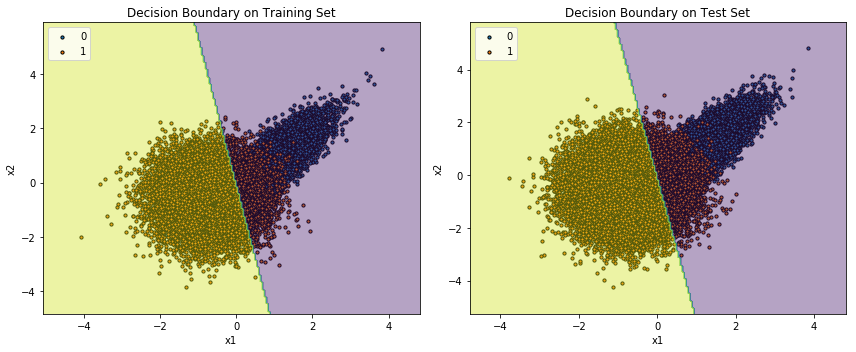

In [268]:
#traininig set
plt.figure(figsize=(12,5))
ax=plt.subplot(1,2,1)
x_min, x_max = min(X_train[1, :]) - 1, max(X_train[1, :]) + 1
y_min, y_max = min(X_train[2, :]) - 1, max(X_train[2, :]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))


temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]
w, _, _ = model(X_train, Y_train, X_test, Y_test, learning_rate=10e-5)


Z = predict_label(w, temp.T, th=optimal_threshold)
Z = Z.reshape(xx.shape)

ax.scatter(X_train[1, (Y_train==0)[0]], X_train[2, (Y_train==0)[0]], label = '0',s = 10, edgecolors='k')
ax.scatter(X_train[1, (Y_train==1)[0]], X_train[2, (Y_train==1)[0]],  label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Training Set')


#testing set
ax=plt.subplot(1,2,2)
x_min, x_max = min(X_test[1, :]) - 1, max(X_test[1, :]) + 1
y_min, y_max = min(X_test[2, :]) - 1, max(X_test[2, :]) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))


temp = np.c_[xx.ravel(),yy.ravel()]
temp = np.c_[np.ones(len(temp)), temp]


Z = predict_label(w, temp.T, th=optimal_threshold)
Z = Z.reshape(xx.shape)

ax.scatter(X_test[1, (Y_test==0)[0]], X_test[2, (Y_test==0)[0]], label = '0',s = 10, edgecolors='k')
ax.scatter(X_test[1, (Y_test==1)[0]], X_test[2, (Y_test==1)[0]],  label = '1',s = 10, edgecolors='k')
ax.contourf(xx,yy,Z,alpha=0.4)
ax.legend()
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Decision Boundary on Test Set')
plt.tight_layout()
plt.show()

The decision boundary is linear and thus not very effective for splitting our data, because our data has obviously non-linear boundary bewtween the two classes.
It could be improve by adding some higher order term as the input feature, say $x_1^2, x_2^2, x_1x_2$.

**(o)** 

/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


Training Cost after iteration 5000: 16858.801989
Too many epoches, Stop trainging.


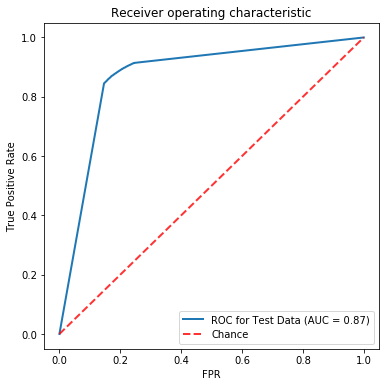

In [234]:
#(o)
from numpy import interp
tprs=[]
aucs=[]
mean_fpr=np.linspace(0,1,100)
i=0

w, _, _ = model(X_train, Y_train, X_test, Y_test, learning_rate=1)
Y_prob = predict_prob(w, X_test)
fpr, tpr, thresholds = roc_curve(Y_test.T, Y_prob.T)

tprs.append(interp(mean_fpr, fpr, tpr))
tprs[-1][0] = 0.0
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(fpr, tpr, lw=2, label='ROC for Test Data (AUC = %0.2f)' %  roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('FPR')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

The test AUC= 0.87. It outperforms Random classifer by 66% (which has a AUC=0.5).

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [322]:
# (a)
import gzip
import os
from urllib.request import urlretrieve
import numpy as np


def load_mnist(path='./data/mnist'):
    # Source: https://mattpetersen.github.io/load-mnist-with-numpy
    url = 'http://yann.lecun.com/exdb/mnist/'
    files = ['train-images-idx3-ubyte.gz',
             'train-labels-idx1-ubyte.gz',
             't10k-images-idx3-ubyte.gz',
             't10k-labels-idx1-ubyte.gz']

    # Create path if it doesn't exist
    os.makedirs(path, exist_ok=True)

    # Download any missing files
    for file in files:
        if file not in os.listdir(path):
            urlretrieve(url + file, os.path.join(path, file))
            print("Downloaded %s to %s" % (file, path))

    def _images(path):
        """Return images loaded locally."""
        with gzip.open(path) as f:
            # First 16 bytes are magic_number, n_imgs, n_rows, n_cols
            pixels = np.frombuffer(f.read(), 'B', offset=16)
        return pixels.reshape(-1, 784).astype('float32') / 255

    def _labels(path):
        """Return labels loaded locally."""
        with gzip.open(path) as f:
            # First 8 bytes are magic_number, n_labels
            integer_labels = np.frombuffer(f.read(), 'B', offset=8)   
    
        def _binary(integer_labels):
            """Return binary label indicating if the digit is 3"""
            return integer_labels == 3
        return _binary(integer_labels.flatten()).astype('int32')
    
    train_images = _images(os.path.join(path, files[0]))
    train_labels = _labels(os.path.join(path, files[1]))
    test_images = _images(os.path.join(path, files[2]))
    test_labels = _labels(os.path.join(path, files[3]))

    return train_images, train_labels, test_images, test_labels

In [323]:
X_train, Y_train, X_test, Y_test = load_mnist(path='./mnist')

In [324]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [325]:
#(b)
label1= np.where(Y_train == 1)[0][:10]
label0 = np.where(Y_train == 0)[0][:10]

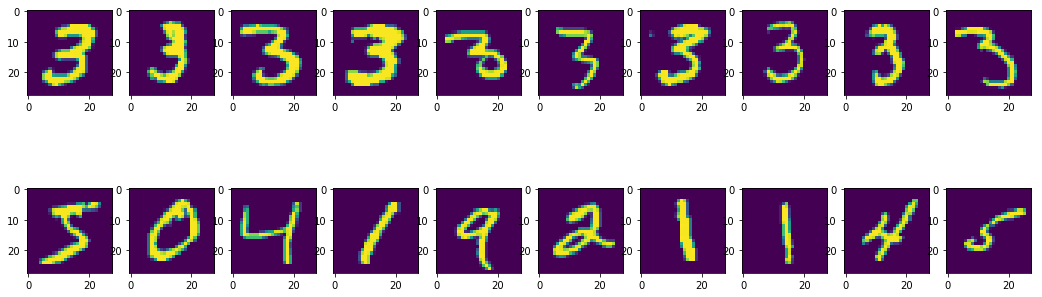

In [361]:
fig, ax = plt.subplots(2,10, figsize=(18,6))
for i, index in enumerate(label1):
    digit = X_train[index].reshape(28,28)
    ax[0, i%10].imshow(digit)
for i, index in enumerate(label0):
    digit = X_train[index].reshape(28,28)
    ax[1, i%10].imshow(digit)

In [327]:
#(c)
n_ones = len(np.where(Y_train == 1)[0])
n_zeros = len(np.where(Y_train == 0)[0])
n = n_ones + n_zeros
print('number of 3s: {0} ({1:2.2f}%)'.format(n_ones, n_ones/n*100))
print('number of non-3s: {0} ({1:2.2f}%)'.format(n_zeros, n_zeros/n*100))

number of 3s: 6131 (10.22%)
number of non-3s: 53869 (89.78%)


/Users/jacqueline/miniconda2/envs/py3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


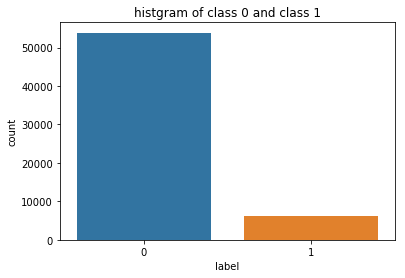

In [328]:
import seaborn as sns
df_label = pd.DataFrame([[1, n_ones], [0, n_zeros]], columns=['label', 'count'])
sns.barplot(x="label", y='count', data=df_label)
plt.title('histgram of class 0 and class 1')
plt.legend()
plt.show()

The dataset is imbalanced, the model may tend to predict all digits to be non-3 so as to achieve high accuracy (e.g. a naive classifier that predict all digits to be non-3 could achieve a high accuracy of 89.78%), which is not want we really want.

In [329]:
#(d)
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [330]:
# logistic classifier 
clf_log = LogisticRegressionCV(cv=3, random_state=0).fit(X_train, Y_train)
scores1 = clf_log.predict_proba(X_train)[:, 1]

fpr1, tpr1, thresholds1 = roc_curve(Y_train, scores1, pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

precision1, recall1, thresholds11 = precision_recall_curve(Y_train, scores1, pos_label=1)

In [331]:
# random classifer
from sklearn.dummy import DummyClassifier

clf_rdm = DummyClassifier('uniform')
clf_rdm.fit(X_train, Y_train)
scores2 = clf_rdm.predict_proba(X_train)[:, 1]

fpr2, tpr2, thresholds2  = roc_curve(Y_train, scores2, pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

precision2, recall2, thresholds22 = precision_recall_curve(Y_train, scores2, pos_label=1)

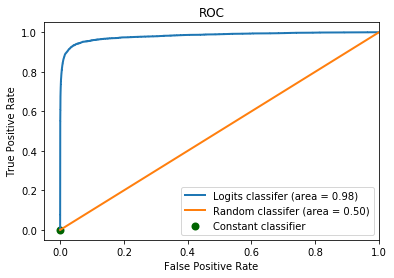

In [332]:
plt.figure()
lw = 2

plt.plot(fpr1, tpr1, lw=lw, label='Logits classifer (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, lw=lw, label='Random classifer (area = %0.2f)' % roc_auc2)
plt.scatter(0, 0, color = 'darkgreen', lw=lw, label='Constant classifier')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [355]:
precision1.shape, recall1.shape

((59389,), (59389,))

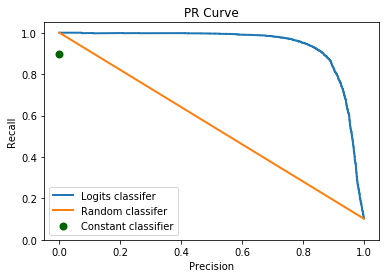

In [357]:
plt.figure()
lw = 2

plt.plot(recall1, precision1, lw=lw, label='Logits classifer')
plt.plot(recall2, precision2, lw=lw, label='Random classifer')
plt.scatter(y=n_zeros/n, x=0, color = 'darkgreen', lw=lw, label='Constant classifier')
plt.ylim([0, 1.05])
plt.xlim([-.05, 1.05])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curve')
plt.legend(loc="lower left")
plt.show()

As can be seen in ROC curve, the logistic classifier outperforms the random classifer, having a better AUC=0.98 comparing to 0.5 for random classifer.

Similarly, as can be seen on the PR Curve, logistic classsifer has a better performance since it is more skew tothe top right.

Constant classfier has the same TPR, FPR, Recall and Precision regardless of the threshold. So, it is only one dot in both ROC and PR Curve.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

## (a) The problem

**Lending Club** is the world's largest peer-to-peer lending platform. Investors can search and browse the loan listings on Lending Club website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. 

The standard loan period is three years. 
- interest rate for borrowers：5.59+
- return on investment(ROI) for investors：6.03%-27.49%
 
Lending Club makes money by charging borrowers an **origination fee**(1.1-5%) and investors a **service fee**(1%).

Dataset that contains complete loan data for all loans issued by Lending Club could be downloaded on their [website](https://www.lendingclub.com/info/download-data.action), including the current loan status (Current, Late, Fully Paid, etc.) and latest payment information. 

It is going to be very useful if we could use this information to **predict if a loan is going to go default** in order to help make the decision of whether Lending club should approve the loan. This could reduce the risk for their business.


## (b）Download & Describe the data

In [162]:
data = pd.read_csv('./data/LoanStats_2017Q2.csv' , encoding='latin-1',skiprows = 1)

# drop half-null columns
data.dropna(thresh=len(data)/2, axis=1, inplace=True)
# drop null rows
data.dropna(inplace=True) 

In [163]:
used_col = ['loan_amnt', 'term', 'int_rate', 'grade', 'issue_d', 'addr_state', 'loan_status', 'purpose', 'annual_inc', 'emp_length', 'delinq_2yrs']
used_data = data[used_col]

## EDA

### Single Variable

#### Loan Status

In [469]:
# encode loan_status: normal = 0, abnormal = 1
def encode(col, codeDict):
    colCoded = pd.Series(col, copy=True)
    for k, v in codeDict.items():
        colCoded.replace(k, v, inplace=True)
    return colCoded

used_data['loan_status_coded'] = encode(used_data.loan_status, {'Current':0, 'Fully Paid':0, 'Charged Off':1, 'Late (31-120 days)':1, 'In Grace Period':1, 'Late (16-30 days)':1, 'Default':1})
used_data.loan_status_coded.value_counts()
# this is quite an unbalanced dataset, we need to deal with it later

0    31038
1     1367
Name: loan_status_coded, dtype: int64

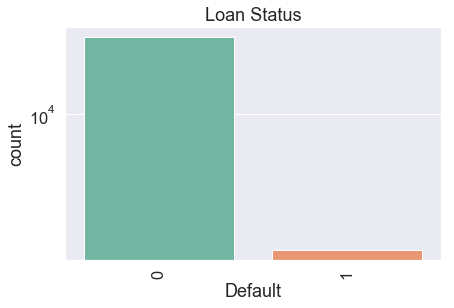

In [478]:
plt.figure(figsize=(6,4))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
ax = sns.countplot('loan_status_coded', data=used_data, palette='Set2', order = used_data['loan_status_coded'].value_counts().index)
ax.set(yscale = 'log')
plt.xlabel('Default')
plt.xticks(rotation=90)
plt.title('Loan Status')

Note that our dataset is highly unbalanced. There are only few loans are defaulted. We'll deal with this later before training our model.

#### Loan Amount

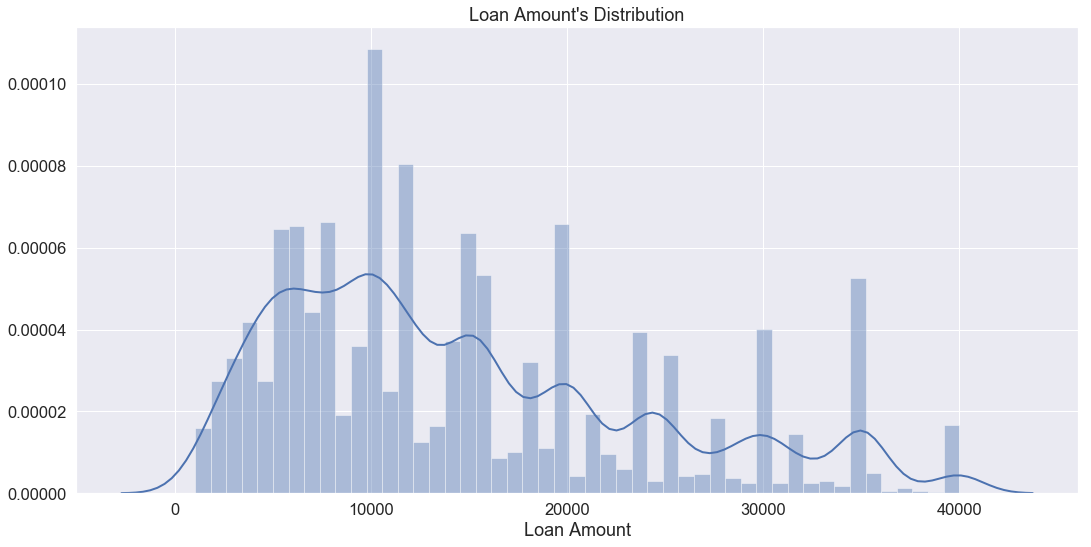

In [479]:
plt.figure(figsize=(16,8))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
plot_loan = sns.distplot(used_data.loan_amnt)
plt.xlabel('Loan Amount')
plt.title('Loan Amount\'s Distribution')



Loan amounts are mostly around $10,000.

#### Term

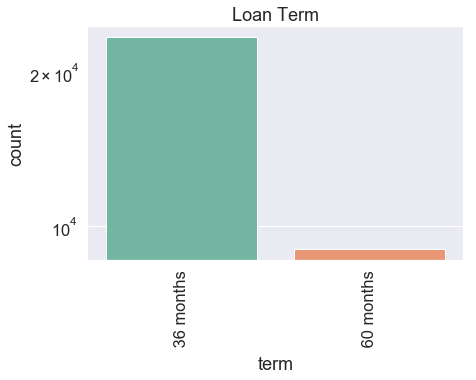

In [472]:
# pie chart
plt.figure(figsize=(6,4))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
ax = sns.countplot('term', data=used_data, palette='Set2', order = used_data['term'].value_counts().index)
ax.set(yscale = 'log')
plt.xticks(rotation=90)
plt.title('Loan Term')

Most are 36 month. Note that the default lending term is 3 yrs (36 month)

#### Purpose

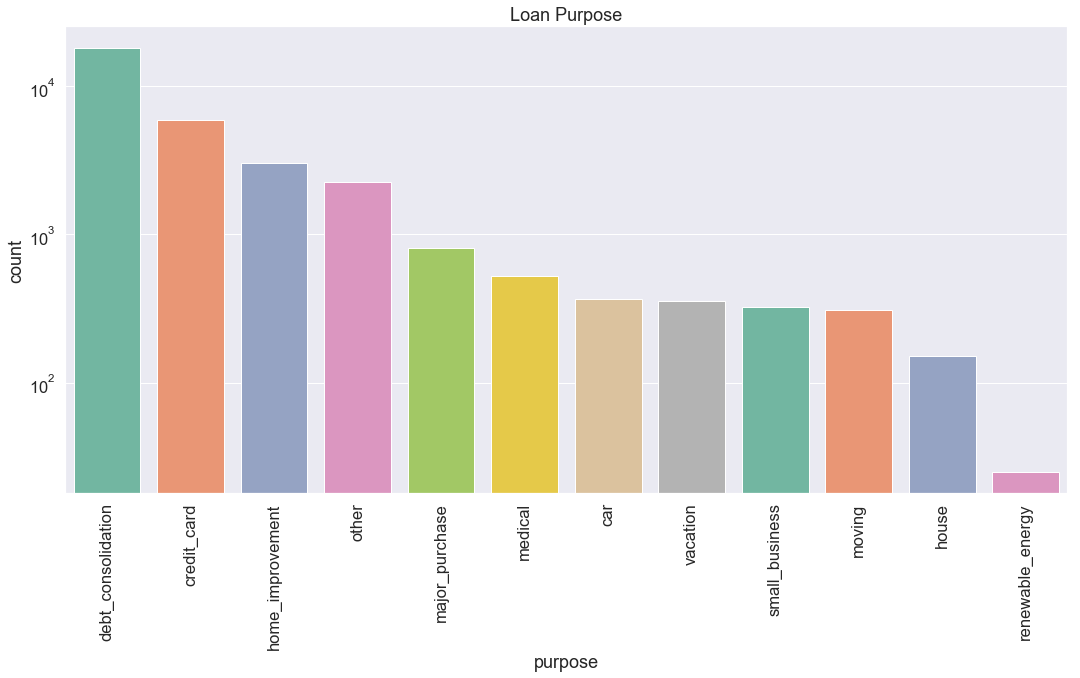

In [482]:
plt.figure(figsize=(16,8))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
ax = sns.countplot('purpose', data=used_data, palette='Set2', order = used_data['purpose'].value_counts().index)
ax.set(yscale = 'log')
plt.xticks(rotation=90)
plt.title('Loan Purpose')


Top 3 purposes: debt_consolidation, credit_card, home_improvement 

#### Grade

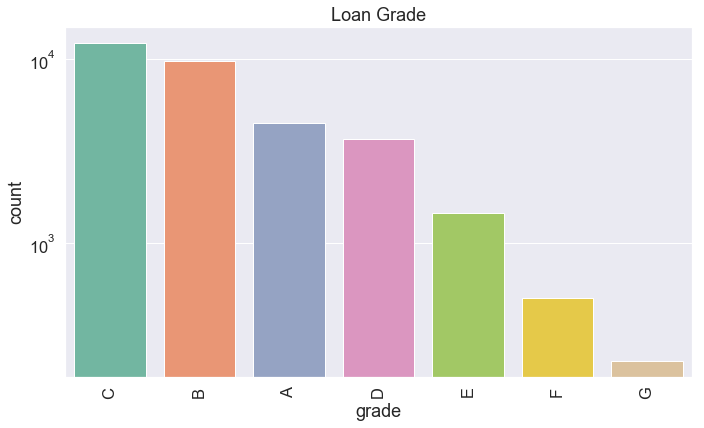

In [483]:
plt.figure(figsize=(10,6))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
ax = sns.countplot('grade', data=used_data, palette='Set2', order = used_data['grade'].value_counts().index)
ax.set(yscale = 'log')
plt.xticks(rotation=90)
plt.title('Loan Grade')

Top 3 Loan Grade: C, B, A. Most borrowers have high credit grades.

#### Interest Rate

In [486]:
# convert interest rate data type: str -> float
used_data['int_rate_num'] = used_data.int_rate.str.rstrip('%').astype('float')

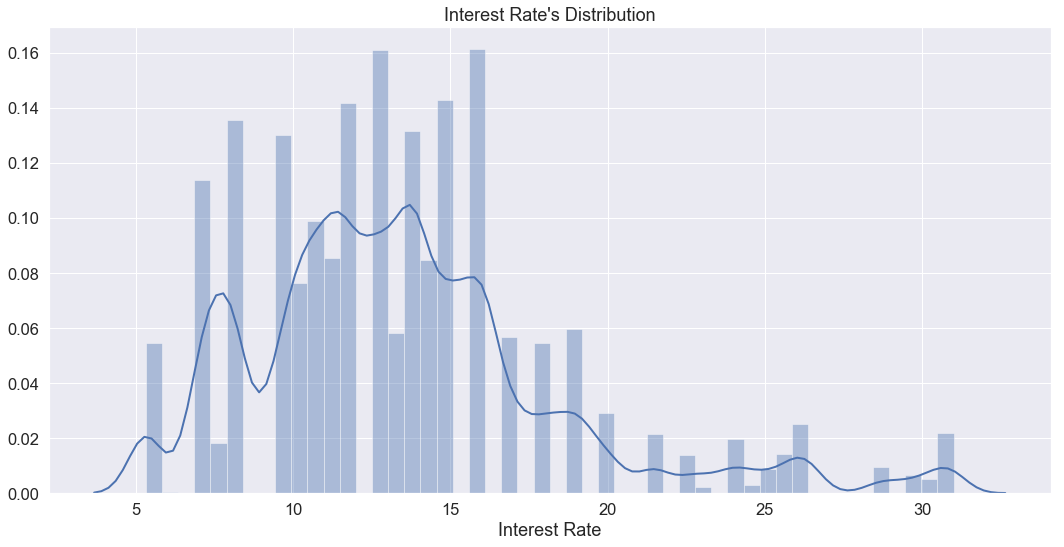

In [488]:
plt.figure(figsize=(16,8))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
plot_loan = sns.distplot(used_data.int_rate_num)
plt.xlabel('Interest Rate')
plt.title('Interest Rate\'s Distribution')
plot_loan.figure.savefig('interest_rate')

Interest rates are mostly around 13%.

### Multiple Variable - Interactions

#### Loan Amount vs. Issued Date

In [489]:
used_data['issue_d2'] = pd.to_datetime(used_data.issue_d)
used_data['issue_month'] = used_data.issue_d2.apply(lambda x: x.to_period('M'))

In [490]:
# sum loan_amnt over issue_month
data_groupby_month = used_data.groupby('issue_month').sum()
data_groupby_month.reset_index(inplace=True)
loan_groupby_month = data_groupby_month[['issue_month', 'loan_amnt']]

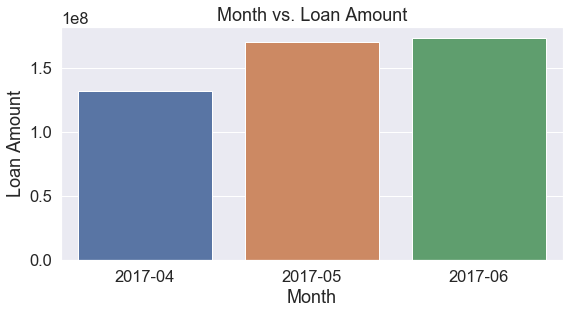

In [493]:
plt.figure(figsize=(8,4))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
plot1 = sns.barplot(x='issue_month', y='loan_amnt', data=loan_groupby_month)
plt.xlabel('Month')
plt.ylabel('Loan Amount')
plt.title('Month vs. Loan Amount')

The total loan amount was on the increase through quarter 2 of 2017.

#### Purpose vs. Interest Rate

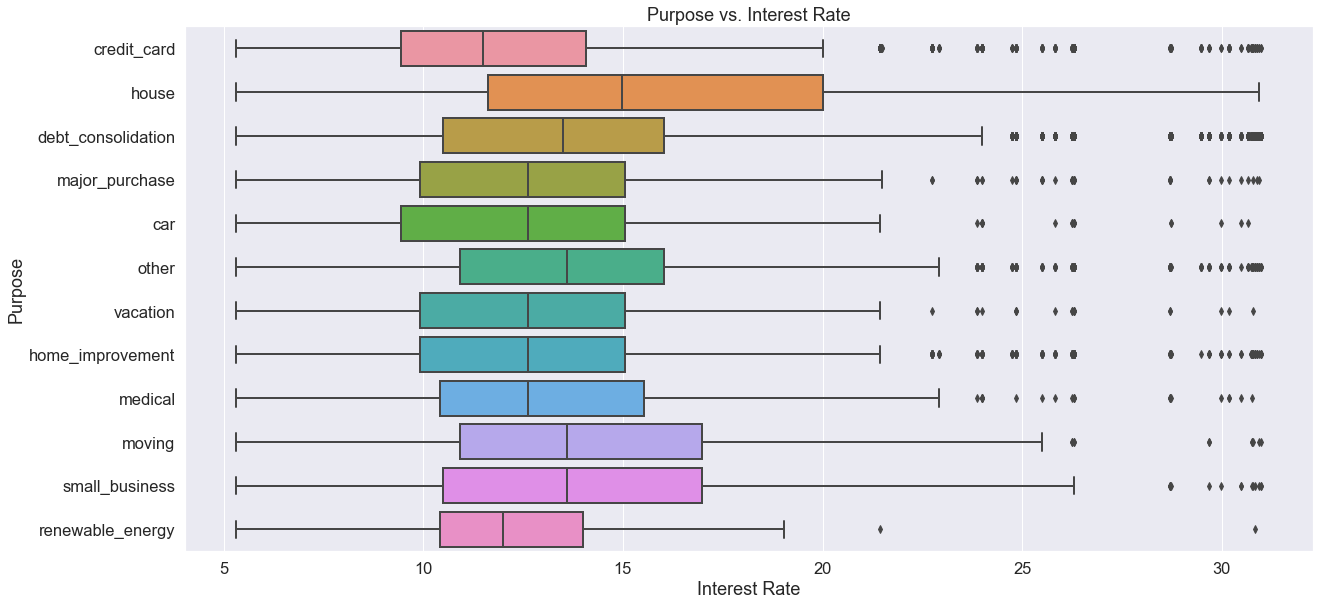

In [496]:
plt.figure(figsize=(18,9))
sns.set()
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':2})
plot3 = sns.boxplot(x='int_rate_num', y='purpose', data=used_data)
plt.xlabel('Interest Rate')
plt.ylabel('Purpose')
plt.title('Purpose vs. Interest Rate')

### Correlation

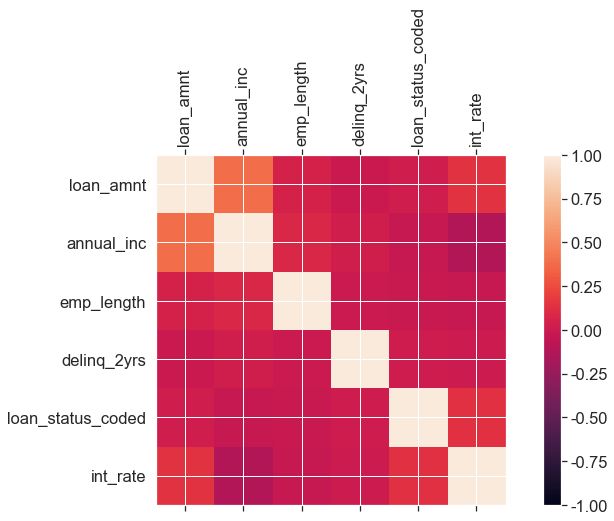

In [500]:
# correlation plot
names = ['loan_amnt', 'annual_inc' ,'emp_length', 'delinq_2yrs', 'loan_status_coded','int_rate' ] #设置变量名
correlations = used_data.corr()
# plot correlation matrix
plt.figure(figsize=(6, 4))
fig = plt.figure() # generate a plotting object

ax = fig.add_subplot(111) # 111 means "1×1 plot，the 1st plot"
cax = ax.matshow(correlations, vmin=-1, vmax=1)  # draw heat map
fig.colorbar(cax)  #add colorbar for heat map

ticks = np.arange(0,6,1) # generate coodinators, from 0 to 5
ax.set_xticks(ticks)  # use coodinators
ax.set_yticks(ticks)

ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation=90)

fig.savefig("Corr")
plt.show()

Note there's a negative corrrelation between annual income vs.interest rate: the more annual income a borrower has, the less interest rate he tends to have.

## (c)
**Target variable**: whether a loan will *go default* (categorical).

**Predictors available**: 104 variables in total. After removing and using RFE & correlation matrix, we have **16** predictors left which are most related to the target variable: 

'loan_amnt',
 'grade',
 'open_acc',
 'total_rec_late_fee',
 'recoveries',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'verification_status_Not Verified',
 'verification_status_Verified',
 'application_type_Individual',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_other',
 'purpose_small_business',
 'term_ 36 months'

**Data Preprocessing**: 
- Missing values: mean inputation for numerical variables.
- Normalization: for all numerical variables, scale them into mean=0, std=1
- Mapping ordinal variables to numerical
- One-hot encoding for categorical variables

See codes for data preprocessing below:

In [520]:
# re-read the data
data = pd.read_csv('./data/LoanStats_2017Q2.csv',  encoding='latin-1',skiprows = 1) 
# Drop columns that has more than 40% of missing values
data = data.dropna(thresh=len(data)*0.4, axis=1)

# drop that column cuz it's not going to provide any useful information
data = data.loc[:, data.apply(pd.Series.nunique) != 1]

# drop nan rows at the tail, copy to a new df
loans = data.drop([105451, 105452])


In [521]:
# convert int_rate, revol_util into type float
loans['int_rate'] = loans['int_rate'].str.rstrip('%').astype('float')
loans['revol_util'] = loans['revol_util'].str.rstrip('%').astype('float')
objectColumns = loans.select_dtypes(include=["object"]).columns
# fill NaN with 'Unknown'
loans[objectColumns] = loans[objectColumns].fillna('Unknown')

In [523]:
numColumns = loans.select_dtypes(include=[np.number]).columns

# Mean interpolation: replace missing values using the mean along the axis.
from sklearn.preprocessing import Imputer
imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(loans[numColumns])   # fit data used to calculate the interpolating values
loans[numColumns] = imr.transform(loans[numColumns])  # fill in missing values with interpolating values

## Feature Engineering

### Manually Drop redundent, irrelevant features 
for categorical variables

In [505]:
objectColumns = loans.select_dtypes(include=['object']).columns

In [506]:
droplist = ['sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
             'mths_since_last_delinq' ,'initial_list_status', 'issue_d','last_pymnt_d','last_pymnt_amnt',
             'next_pymnt_d','last_credit_pull_d','collection_recovery_fee', 'earliest_cr_line', 'pymnt_plan', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']

loans.drop(droplist, axis=1, inplace=True)

In [508]:
loans.select_dtypes(include=['object']).shape

(105451, 8)

### Deriving [Installment Feat]
The ratio of monthly installment vs. monthly income
- installment: The monthly payment owed by the borrower if the loan originates.
- annual_inc: The self-reported annual income provided by the borrower during registration.

In [509]:
loans['installment_feat'] = loans['installment'] / (loans['annual_inc'] / 12)

In [510]:
# replace inf with max*2, max is 3051
import math
loans.installment_feat[loans.installment_feat.apply(math.isinf)] = 6000

### Feature Abstraction 
#### Binarization [Loans Status]

In [513]:
# encoding loan_status: non-default = 0, default = 1   obj -> int
codeDict = {'Current': 0, 'Fully Paid': 0, 'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1, 'Default': 1}
for key, value in codeDict.items():  # items() list of return tuple
    loans.loan_status.replace(key, value, inplace=True)

#### Ordinal Values [Emp Length & Grade]

In [515]:
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "Unknown": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loans.replace(mapping_dict, inplace=True)

#### Nominal Values: One-hot Encoding

In [517]:
nominalColumns = ['home_ownership', 'verification_status', 'application_type', 'purpose', 'term'] 
dummy_df = pd.get_dummies(loans[nominalColumns])
loans = pd.concat([loans, dummy_df], axis=1)

In [370]:
loans.drop(nominalColumns, axis=1, inplace=True)

### Feature Scaling 
#### Standardization [All numerical variables except for Loan Status]

In [371]:
col = loans.select_dtypes(include=['int64','float64']).columns
col = col.drop('loan_status') # drop the outcome variable

In [372]:
from sklearn.preprocessing import StandardScaler 
sc =StandardScaler() 

loans_ml_df = loans # copy loans to loans_ml_df
loans_ml_df[col] =sc.fit_transform(loans_ml_df[col]) # standardization

### Feature Selection

In [519]:
# building x_feature & y_feature (target)
x_feature = list(loans_ml_df.columns)
x_feature.remove('loan_status')

x_val = loans_ml_df[x_feature]
y_val = loans_ml_df['loan_status']
len(x_feature)

104

#### Wrapper Approach: Recursive Feature Elimination

In [396]:
# takes about 8 min
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 30) # keep only 30 features
rfe = rfe.fit(x_val, y_val)
print(rfe.support_)
print(rfe.ranking_) # 1s are features selected

[ True  True  True False  True  True False False False False False  True
 False False False False  True  True  True  True  True  True  True  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False False False False False  True  True False  True  True
  True  True  True  True  True False False False False  True  True False
 False  True False  True False False  True  True]
[ 1  1  1  8  1  1 36  9 46 31 57  1 28 33 23 39  1  1  1  1  1  1  1  1
 63 70 75 69 54 52 18 10 65 19 43 16 11 30 60 21 48 47 58 25 53 34 44 61
 51 66 37 26 59 62 72 15 67 49 14 55  7 56 13 38 32  1 73 50 35 17 64 45
 29 27 74 22  6 20 71  1  1 68  1  1  1  1  1  1  1 41  2  4  3  1  1 40
 42  1 12  1  5 24  1  1]


In [397]:
col_filter_1 = x_val.columns[rfe.support_]

In [524]:
print(col_filter_1)

['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'grade', 'open_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'num_sats', 'home_ownership_ANY', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified', 'application_type_Individual', 'application_type_Joint App', 'purpose_house', 'purpose_major_purchase', 'purpose_other', 'purpose_small_business', 'term_ 36 months', 'term_ 60 months']


#### Filter Approach: Correlation Matrix

In [426]:
# drop variables with high correlations
corrMatrix = loans_ml_df[col_filter_1].corr()
upTri = np.triu(corrMatrix.as_matrix(), 1) # triu() returns the upper trangular part of the matrix
absUptri = np.abs(upTri)
corrMatrix = pd.DataFrame(absUptri, columns=corrMatrix.columns)
colList = corrMatrix.apply(lambda x: all(x <= 0.55))
col_filter_2 = [col for col,flag in zip(col_filter_1, colList.values) if flag] 

In [427]:
col_filter_2

['loan_amnt',
 'grade',
 'open_acc',
 'total_rec_late_fee',
 'recoveries',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'verification_status_Not Verified',
 'verification_status_Verified',
 'application_type_Individual',
 'purpose_house',
 'purpose_major_purchase',
 'purpose_other',
 'purpose_small_business',
 'term_ 36 months']

In [428]:
len(col_filter_2)

16

#### Plot feature importance using RF

In [525]:
names = loans_ml_df[col_filter_2].columns
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10,random_state=123) 
clf.fit(x_val[col_filter_2], y_val)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

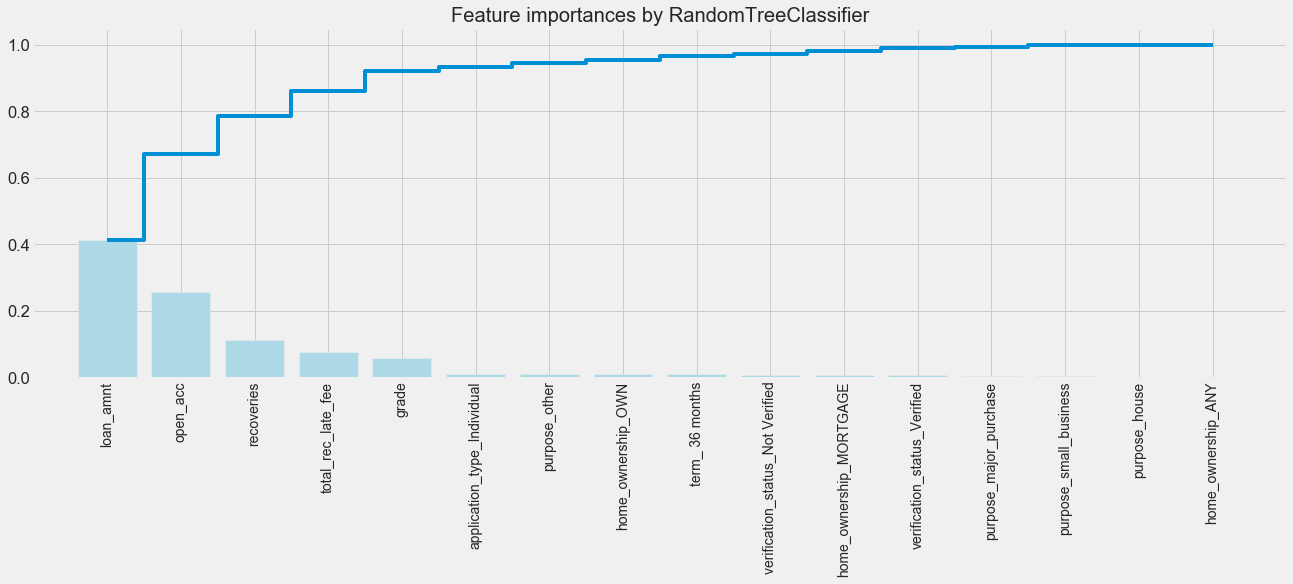

In [527]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8,5)

# feature importances -- visualization
importances = clf.feature_importances_
feat_names = names
indices = np.argsort(importances)[::-1][:20]
fig = plt.figure(figsize=(20,6))
plt.title("Feature importances by RandomTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

## (d)
I am going to apply logistic regression to solve this problem. Beacause it is a binary classsification problems and logistic regression is one of the most common and easy-to-understand way of dealing with such problems.


## (e)
I will use ROC curve to evaluate the model's performance. It should be skewed to the left top, above the diagonal line y=x, which is the ROC curve of a random classifer.



## (f)

I devided the dataset into training and testing sets with ratio 70% : 30%. I applied cross validation for selecting the regularization approach(l1 or l2), as well as the hyperparameter C(regularization strength).

## (g) Model Trainging & Evaluation

### Training

#### Deal with unbalanced data: oversampling

In [435]:
X = loans_ml_df[col_filter_2] # using filter approach
y = loans_ml_df['loan_status']

n_sample = y.shape[0]
n_pos_sample = y[y==0].shape[0]
n_neg_sample = y[y==1].shape[0]
print(n_pos_sample, n_neg_sample)

print('total samples: {}; positive: {:.2%}; negative: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))
print('feature dimension: ', X.shape[1])

99198 6253
total samples: 105451; positive: 94.07%; negative: 5.93%
feature dimension:  16


In [436]:
# increse the number of negative samples using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X, y = sm.fit_sample(X, y)

n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]

print(n_pos_sample, n_neg_sample)

print('total samples: {}; positive: {:.2%}; negative: {:.2%}'.format(n_sample, n_pos_sample / n_sample, n_neg_sample / n_sample))

99198 99198
total samples: 198396; positive: 50.00%; negative: 50.00%


### Fit

#### Deal with overfitting -- cross-validation

In [437]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

param_grid = {'C': [100, 1000], 'penalty': [ 'l1', 'l2']}

# param grid search ，cv=5-fold
clf2 = GridSearchCV(LogisticRegression(), param_grid, cv=5) 
clf2.fit(X_train, y_train)

# takes about 30 min

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [439]:
import pickle
# save the model to disk
filename = 'final_model.sav'
pickle.dump(clf2, open(filename, 'wb'))

# load the model from disk
clf2 = pickle.load(open(filename, 'rb'))

In [440]:
results = pd.DataFrame(clf2.cv_results_ ) 
best = np.argmax(results.mean_test_score.values)

In [442]:
print("Best parameters: {}".format(clf2.best_params_))
print("Best cross-validation score: {:.5f}".format(clf2.best_score_))
print("Best estimator:\n{}".format(clf2.best_estimator_))

Best parameters: {'C': 1000, 'penalty': 'l1'}
Best cross-validation score: 0.67954
Best estimator:
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Evaluation

In [450]:
# gives proba for each label
y_prob =clf2. predict_proba(X_test)

In [461]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,0], pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.682518


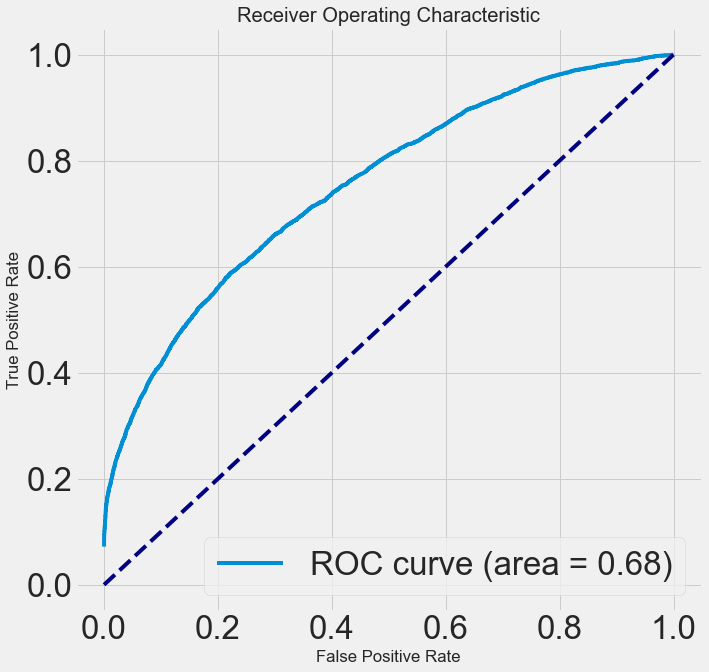

In [468]:
from sklearn.metrics import roc_curve, roc_auc_score
# plot the ROC curve
plt.figure(figsize=(10,10))
fpr, tpr, threshold = roc_curve(y_test, y_prob[:, 1])
plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")

## (h)

It has a AUC of 0.68, which outperforms random classifier by 36%. The model did pretty well in the sense that it is quite hard to predict the possibility of a loan to go default, giving that there are 100+ variables available. I think the feature selection part is of great importance, because it will allow us to use only predictors that will greatly imporve our prediction result. I eliminate the number of predictor to only 16 and it still takes 30 min for me to train. I cannot imagine how long it will take with 108 predictors. After all, in reality, a simple but powerful model is what we want. 

 Considering the simplicity of Logistic regression, I think the model is already doing pretty good. However, the AUC should be able to increase by applying more complex model.

## (i)
Getting Loans that go default are the key risk that loan companies are facing. Being able to predict which loan application could go default before approving the loan is one of the cruicial tasks that could reduce the risk and bring benefit to those companies. 

The logistic classifier we use to predict whether a loan will go default uses loan-related data and applicant's credit & demographic data as input, will be able to tackle with such problem. The model has simple architecture yet relatively powerful predicting probability. It has a AUC of 0.68, which outperforms random classifier by 36%. By predicting a loan's probability of going default, the loan company will be able to make better decision of approving loan applications.

# Reference
[Logistic Regression Derivative](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression)

[Loading mnist dataset](https://mattpetersen.github.io/load-mnist-with-numpy)